In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
teams = pd.read_csv("datasets/kaggle_data/MTeams.csv")
seeds = pd.read_csv("datasets/kaggle_data/MNCAATourneySeeds.csv")

In [26]:
min_season = seeds["Season"].min()
max_season = seeds["Season"].max()
min_team = teams["TeamID"].min()
max_team = teams["TeamID"].max()

In [45]:
def filter_nan(data, year):
    series = data.loc[year, :]
    return data.loc[year, series.notnull()]

In [74]:
def plot_correlation(min_year, max_year, in_tourney, tourney_wins, predictor, color, ax, nan):
    for season in range(min_year, max_year):
        # teams in the tournemnt
        tourney_status = in_tourney.loc[season, :]
        tourney_teams = tourney_status[tourney_status[:] > 0].index

        # filtered predictor
        if nan:
            pred = filter_nan(predictor, season)   
        else:
            pred = predictor.loc[season, :]
        
        pred_tourney_teams = pred.loc[tourney_teams]
    
        # filtered tourney wins
        wins = tourney_wins_matrix.loc[season]
        wins_tourney_teams = wins[tourney_teams]

        # index of positive wins in tourney
        ax.scatter(pred_tourney_teams, wins_tourney_teams, color=color)

### Load in variables

In [75]:
in_tourney_matrix = pd.read_csv("datasets/generated_data/in_tourney_matrix", index_col=0)
tourney_wins_matrix = pd.read_csv("datasets/generated_data/tourney_wins_matrix", index_col=0)

In [76]:
rpi_matrix.shape

(37, 372)

In [77]:
min_season

1985

### Visualize

<b>1) RPI (SOS)</b>

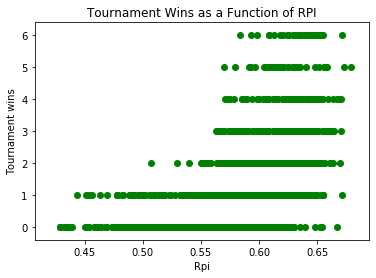

In [82]:
rpi_matrix = pd.read_csv("datasets/generated_data/regular_season_rpi_matrix", index_col=0)

fig = plt.figure()
ax = fig.add_subplot(111)

# plot rpi 
plot_correlation(min_season, max_season, in_tourney_matrix, tourney_wins_matrix, rpi_matrix, "green", ax, True)

ax.set_xlabel("Rpi")
ax.set_ylabel("Tournament wins")
ax.set_title("Tournament Wins as a Function of RPI")
plt.show()

As we can see, there appears to be some correlation between RPI and tournament wins, as we would expect. Thus it seems valid to consider including RPI or some other metric of strenght of schedule in our model to predict whether a team will win a tournament game.

<b>2) Win Percentage vs. Tournament Teams <b>

NameError: name 'win_percentage_vs_tourney_teams_matrix' is not defined

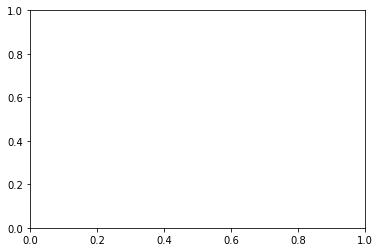

In [84]:


fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

for season in range(min_season, max_season):
    # teams in the tournemnt
    tourney_status = in_tourney_matrix.loc[season, :]
    tourney_teams = tourney_status[tourney_status[:] > 0].index.values

    # filtered predictor
    pred = win_percentage_vs_tourney_teams_matrix.loc[season, :]
    pred_tourney_teams = pred.loc[tourney_teams.astype(np.float)]
    
    # filtered tourney wins
    wins = tourney_wins_matrix.loc[season]
    wins_tourney_teams = wins[tourney_teams]

    # index of positive wins in tourney
    ax2.scatter(pred_tourney_teams, wins_tourney_teams, color="red", alpha=.25)
    
ax2.set_xlabel("Win Percentage Vs. Tournament Teams Regular Season")
ax2.set_ylabel("Tournament wins")
ax2.set_title("Tournament Wins as a Function of Reg Season Percentage Vs. Tournament Teams")
plt.show()

As we can see there is only a very small correlation between the win percentage in the regular season and tournament wins, which is somewhat unexpected. However, we could think that teams which win in the tournament are "battle tested" and will have played serveral regular season games against good teams, leading to a low percentage of wins versus highly ranked teams. As such, we will consider total wins instead of win percentage.